# Introduction

Generative Adversarial Networks (GANs) are a modern content-generation network architecture first introduced in 2014. These models are comprised of two networks which work against one another, called the generator and the discriminator (or adversary). The generator is trained to transform noise into content resembling the training data, while the discriminator is trained to distinguish between real training data and generated content.

This can be viewed as a forgery detection task where the generator is making forgeries and the discriminator is learning how to detect forgeries. The objective is to have the discriminator detecting forgeries 50% of the time, or choosing randomly if the image is real or forged. As training goes on, the discriminator learns better and better how to detect fakes, and the generator improves at fooling the discriminator.

The space of possible inputs to the generator network is referred to as the latent space. Ideally, two similar points in the latent space will have similar (but not identical) generator outputs.

# History

## 2014 -  Generative Adversarial Nets.
GANs were first introduced in 2014 by Ian J. Goodfellow and a team of researchers at the University of Montreal. They showed that this two-model system could be used to train models of opposite, but related tasks. In their work, the implemented the generator and the discriminator as simple multi-layer perceptrons.

They based the loss function off of a two-player minmax game function where the discriminator is trying to maximize its score (correct forgery detections) and the generator is trying to minimize its score (forgery detections).

<img src="./images/gan-minmax.png">

Where $G$ is the generator, $D$ is the discriminator, $x$ is the training data, and $z$ is noise. This is quite different from traditional deep learning models where the objective is to minimize some value. With generative adversarial networks, we are instead trying to balance the performance of the two networks without letting one dominate the other. This can make them difficult to train.

In order to avoid overfitting the discriminator, model training alternated between adjusting the discriminator and the generator. Specifically, the discriminator would update for $k$ steps before switching and updating the generator for one step.

(Generative Adversarial Nets., Goodfellow et al.)

## 2015 - Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks
Deep Convolutional Generative Adversarial Networks (DCGANs) were introduced in 2015 by a team of researchers at indico Research in Boston. They applied CNNs to unsupervised learning using the two-network generator/descriminator approach put forth by Goodfellow et al. Up until this point, CNNs had primarily been used for supervised learning for classification of images.

Radford et al. had two major goals with this research. First, they wanted to train GANs to learn feature representations of unlabeled image and video data so that the representations could be transfered into a separate model that is trained in a supervised manor. Doing this would hopefully speed up the training time of the image classification network because the filters would have been learned by the discriminator. Second, the team wanted to visualize what filters the GANs learn and how the generator uses those filters to draw new images.

The team used three image sets to evaluate their architecture: Large-scale Scene Understanding (LSUN), Imagenet-1k, and a data set of faces. When training on scenes, the generator was able to produce the following images of fake bedrooms.

<img src="./images/gan-bedrooms.png">

When training on face images, the team was able to perform vector arithmetic on sets of images to create classes of images that were not represented in the original data. For example, by starting with a man with glasses and subtracting a general man and adding a general woman will produce images of a woman with glasses.

<img src="./images/gan-vector-faces.png">

(Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks, Radford et al.)

## 2016 - Generative Adversarial Text to Image Synthesis
An interesting unsovled problem is generating a photo-realistic image from a sentence describing that image. In other words, taking a caption for an image and using that string to create the image. Researchers at the University of Michigan, Ann Arbor, created a generative adversarial network that does just that.

The network is trained using pre-captioned images. A convolutional-recurent network creates a representation of the string that is given to both the generator and the discriminator. It is up to the discriminator to decide if the string is an accurate description of the image it is receiving. The generator also receives the string and creates an image that is meant to fool the discriminator.

<img src="./images/gan-text-to-image-model.png">

Some examples are given below. It is important to consider the quality of the captions on the training data when creating these models. If you were to have a large group of undergrads caption your test images for you, it is likely that they will use different terms to describe the image than the researcher who tries to generate a new image from a caption. In the fourth example below, the input string includes "raised orange stamen", but none of the generated images carry this feature. It is possible that it was not in the training set at all.

<img src="./images/gan-text-to-image.png">

(Generative Adversarial Text to Image Synthesis, Reed et al.)

## 2016 - Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network
Z. Wang, et al. were able to show that deep convolutional neural networks could be used to compress and reconstruct images using an encoder and decoder pair that operate on a shared sparse latent space (Deep networks for image super-resolution with sparse prior, Z. Wang, at al.). However, small details fail to be captured and reconstructed by this method. A team of researchers at twitter showed that the generators in GANs could be used to generate high-resolution, photo-realistic images.

The researchers generated data by taking high-resolution images and applying filters on them to obtain low-resolution versions of the same image. The generator was then trained to take the low-resolution versions and upsample them into images that fooled the discriminator when compared to the original, high-resolution images.

They used a perceptual loss function that uses adverserial loss and content loss. The content loss is based on the ReLU activation layers of VGG19, similar to the VGG loss used by Gatys et al. to minimize the perceptual loss in neural style transfer. The adversarial loss is defined by traying to minimize the probability of the discriminator deciding that a generated image is fake.

The resulting images were compared using mean opinion score testing to the original images. 26 image raters were presented the original high-resolution images and images generated using eight other encoding methods, including the GAN implementation. Using a scale of 1 - 5, 1 being poor quality, and 5 being excellent quality, the original images were rated at around 4.3 - 4.4, and the GAN generated iamages were rated 3.5 - 3.7.

(Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network, Christian Ledig et al.)

## 2018 - Progressive Growing of GANs for Improved Quality, Stability, and Variation
A problem with generating high-resolution images using GANs is that it becomes easier for the descriminator to detect fake images because of the work associated with generating photo-realistic images at a large scale. To address this, team of researchers at NVIDIA introduced a method of generating progressively higher resolution images with GANs by increasing the resolution of images over many iterations. The training starts with low-resolution images and progressively adds more layers in the generator network as it increases the resolution of the training images. This allows for a faster training cycle because less time and memory is needed to generate each batch of images.

They applied this method to images of celebrities to generate dozens of images of fake celebrities that are photo-realistic. The generator and descriminator are mirror models of each other and layers are added to them at the same time during training and growth.

<img src="./images/gan-faces.png">

(Progressive Growing of GANs for Improved Quality, Stability, and Variation, Karras et al.)

# Common Problems

## Mode Collapse
Mode collapse can be summarized as a failure of the generator to express a variety of features of the data it is trying to imitate. If the data the generator is trying to mimic has multiple modes (bi-modal, tri-modal, etc.), a common problem when training GANs is that the mode of the data generated will only represent one of the modes of the original data. This can lead to training oscillation where the generator produces data following one mode, so the discriminator learns that all data from that mode is fake, and data from any other mode is real. Then, the generator learns that the discriminator thinks all data from another mode is considered real, so it switches to that mode, and so forth.

Mode collapse is generally easy to detect, as results from the generator will appear nearly identical.

There are several methods for countering mode collapse. The first is to encourage diversity in the individual batches so that the discriminator can compare all of the elements of the batch to each other to see if items are real or fake.

Another method is using unrolled GANs so that the generator can see how the discriminator will react to a certain set of inputs. When unrolling a GAN, the generator provides input to multiple update stages of the discriminator before the discriminator is updated. The generator can then learn from how the discriminator reacted to the generated inputs before updating itself. This essentially allows the generator to see into the future of the discriminator's decisions based on the generator's current outputs. This will significantly increase the training time because the discriminator needs to be updated several times for a single generator update, and then those changes are discarded. (Unrolled Generative Adversarial Networks, Luke Metz, et al.)

The method of experience replay shows old, forged samples to the discriminator every so often so it remembers what forged samples from a different mode look like.

The last method for countering mode collapse is to accept that the generator will learn a single mode, and use multiple generators to cover each mode in the data. This way, one discriminator will keep seeing multiple forged images from each data mode, balancing its training. Again, this will substantially increase the training time because multiple networks need to be updated in each epoch.

(Mode collapse in GANs, Aiden Nibali)

## Overpowerment
Another common problem in training GANs is overpowerment, where one network learns how to easily exploit the other. This can happen in the generator, where the generator learns to put features in the forged images that frequently result in false negatives in the discriminator. This can also happen in the discriminator where it starts guessing classification values close to 0 or 1 which drive the gradient down and make it slow to update the generator.

There are several methods for addressing overpowerment. Since the discriminator typically overpowers the generator, it can be helpful to slow down the learning rate of the discriminator. It can also be useful to unroll the GAN as described above. This can give the generator more information to help balance the training of the two models. (Unrolled Generative Adversarial Networks, Luke Metz, et al.)

# Examples

## Fashion MNIST
Here, a GAN is used to generate images of fake clothing based on the fashion MNIST data set. This is based on the Keras DCGAN implementation that can be found here:
https://github.com/jacobgil/keras-dcgan

Which is based off of the Alec Radford et al. paper. The pretrained weights for this model can be downloaded from here:
https://drive.google.com/open?id=1SBy9SzeqhVYy7Y60Cg24PEbskON_JLOe

The data set can be viewed here:
https://github.com/zalandoresearch/fashion-mnist

The generator will take an input vector z of random noise, and generate an image. This network is trained with the loss calculated from how the discriminator classifies the generated images. The discriminator will take an image and classify it as fake or real.

Because we are training the generator on loss computed from the discriminator's output, we combine the models for convenience.

Training is composed of these steps:
1. Feed (predict) vectors of random noise through generator to get generated images.
2. Train discriminator with real images and generated images.
3. Feed (predict) same vectors of random noise through discriminator, and train generator with this loss.

Generating images is done just by feeding the generator random noise. The discriminator can be used to filter out the most "realistic" images.

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
import numpy as np
from PIL import Image
import argparse
import math
import os

def generator_model():
    model = Sequential()
    
    model.add(Dense(input_dim=100, units=1024))
    model.add(Activation('tanh'))
    
    model.add(Dense(128*7*7))
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    
    model.add(Reshape((7, 7, 128), input_shape=(128*7*7,)))
    
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(64, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(1, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    
    return model

def discriminator_model():
    model = Sequential()
    
    model.add(
            Conv2D(64, (5, 5),
            padding='same',
            input_shape=(28, 28, 1))
            )
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (5, 5)))
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(1024))
    model.add(Activation('tanh'))
    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    return model

def generator_containing_discriminator(g, d):
    model = Sequential()
    model.add(g)
    d.trainable = False
    model.add(d)
    return model

# Utility function combine generated images into a tiled image
def combine_images(generated_images):
    num = generated_images.shape[0]
    width = int(math.sqrt(num))
    height = int(math.ceil(float(num)/width))
    shape = generated_images.shape[1:3]
    image = np.zeros((height*shape[0], width*shape[1]),
                     dtype=generated_images.dtype)
    for index, img in enumerate(generated_images):
        i = int(index/width)
        j = index % width
        image[i*shape[0]:(i+1)*shape[0], j*shape[1]:(j+1)*shape[1]] = \
            img[:, :, 0]
    return image

def train(EPOCHS, BATCH_SIZE, TRAIN_PROCESS_DIR):
    os.makedirs(TRAIN_PROCESS_DIR, exist_ok=True)

    (X_train, y_train), _ = fashion_mnist.load_data()
    X_train = (X_train.astype(np.float32) - 127.5)/127.5
    X_train = X_train[:, :, :, None]
    d = discriminator_model()
    g = generator_model()
    d_on_g = generator_containing_discriminator(g, d)
    d_optim = SGD(lr=0.0005, momentum=0.9, nesterov=True)
    g_optim = SGD(lr=0.0005, momentum=0.9, nesterov=True)
    g.compile(loss='binary_crossentropy', optimizer="SGD")
    d_on_g.compile(loss='binary_crossentropy', optimizer=g_optim)
    d.trainable = True
    d.compile(loss='binary_crossentropy', optimizer=d_optim)
    for epoch in range(EPOCHS):
        print("Epoch is", epoch)
        print("Number of batches", int(X_train.shape[0]/BATCH_SIZE))
        for index in range(int(X_train.shape[0]/BATCH_SIZE)):
            noise = np.random.uniform(-1, 1, size=(BATCH_SIZE, 100))
            image_batch = X_train[index*BATCH_SIZE:(index+1)*BATCH_SIZE]
            generated_images = g.predict(noise, verbose=0)
            if index % 20 == 0:
                image = combine_images(generated_images)
                image = image*127.5+127.5
                file_name = "%d_%d.png" % (epoch, index)
                Image.fromarray(image.astype(np.uint8)).save(
                        os.path.join(TRAIN_PROCESS_DIR, file_name))
            X = np.concatenate((image_batch, generated_images))
            y = [1] * BATCH_SIZE + [0] * BATCH_SIZE
            d_loss = d.train_on_batch(X, y)
            print("batch %d d_loss : %f" % (index, d_loss))
            noise = np.random.uniform(-1, 1, (BATCH_SIZE, 100))
            d.trainable = False
            g_loss = d_on_g.train_on_batch(noise, [1] * BATCH_SIZE)
            d.trainable = True
            print("batch %d g_loss : %f" % (index, g_loss))
            if index % 10 == 9:
                g.save_weights('generator', True)
                d.save_weights('discriminator', True)
                
def generate(BATCH_SIZE, nice=False):
    g = generator_model()
    g.compile(loss='binary_crossentropy', optimizer="SGD")
    g.load_weights('generator')
    if nice:
        d = discriminator_model()
        d.compile(loss='binary_crossentropy', optimizer="SGD")
        d.load_weights('discriminator')
        noise = np.random.uniform(-1, 1, (BATCH_SIZE*20, 100))
        generated_images = g.predict(noise, verbose=1)
        d_pret = d.predict(generated_images, verbose=1)
        index = np.arange(0, BATCH_SIZE*20)
        index.resize((BATCH_SIZE*20, 1))
        pre_with_index = list(np.append(d_pret, index, axis=1))
        pre_with_index.sort(key=lambda x: x[0], reverse=True)
        nice_images = np.zeros((BATCH_SIZE,) + generated_images.shape[1:3], dtype=np.float32)
        nice_images = nice_images[:, :, :, None]
        for i in range(BATCH_SIZE):
            idx = int(pre_with_index[i][1])
            nice_images[i, :, :, 0] = generated_images[idx, :, :, 0]
        images = nice_images
    else:
        noise = np.random.uniform(-1, 1, (BATCH_SIZE, 100))
        images = g.predict(noise, verbose=1)
    images = images*127.5+127.5
    return np.squeeze(images)

### Loading the dataset

In [7]:
(X,_), (_, _) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_gallery(images, titles=None, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap='gray')
        if titles:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

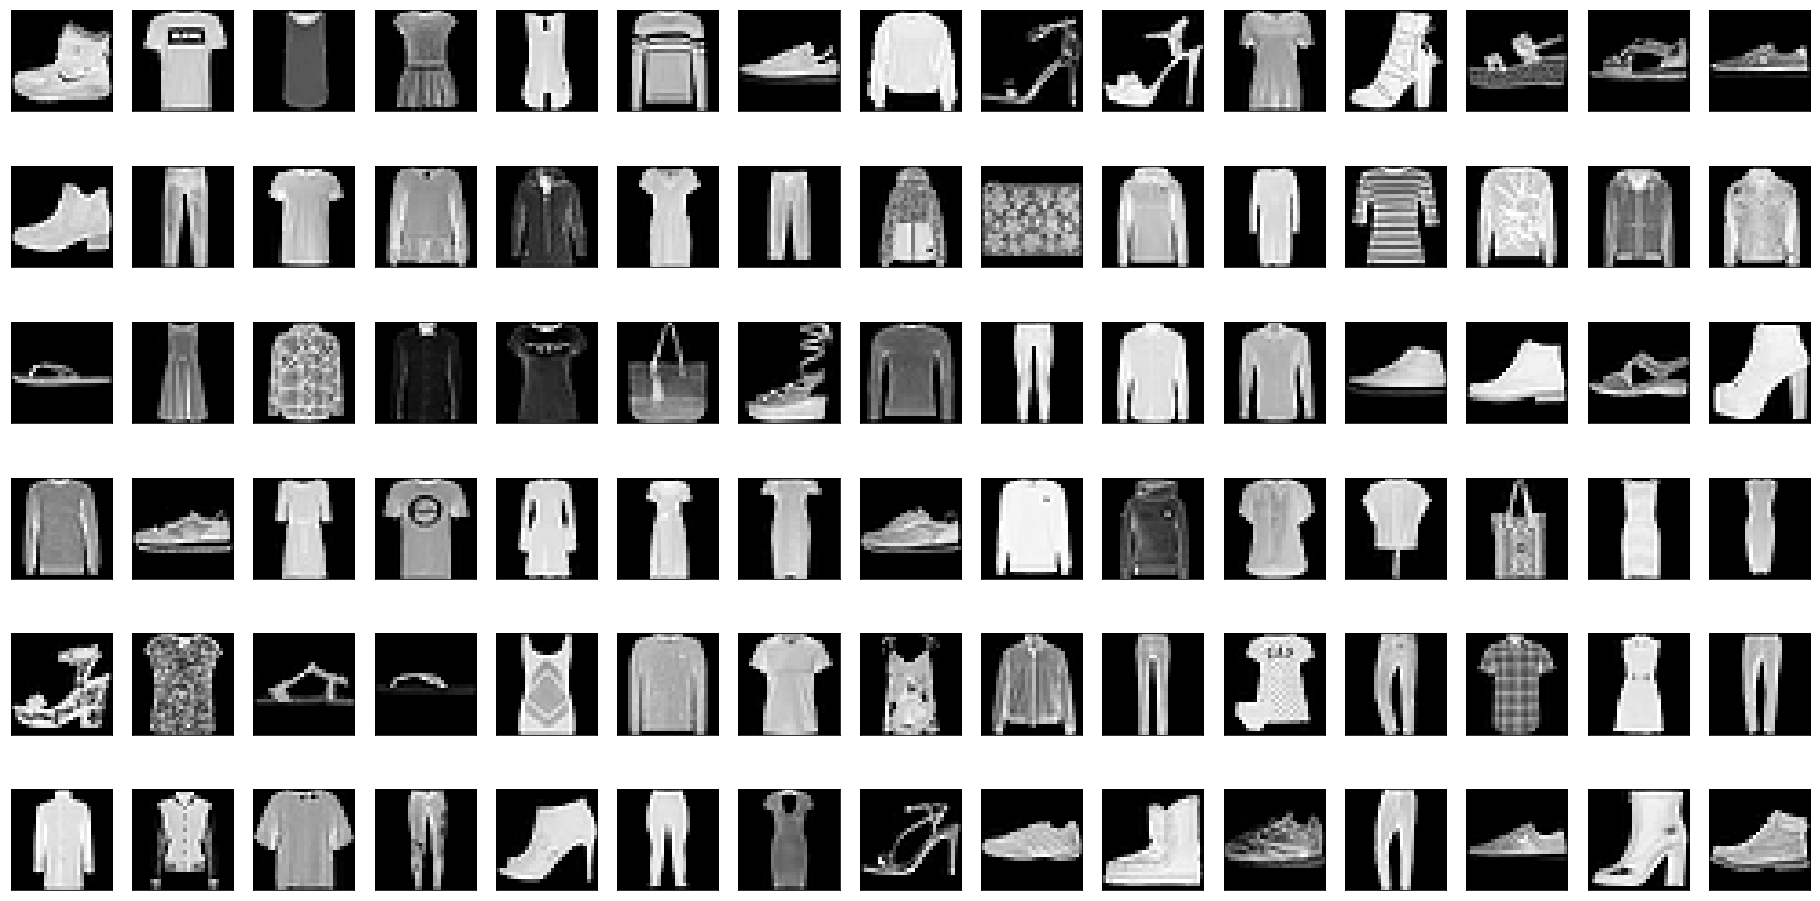

In [9]:
plot_gallery(X, n_row=6, n_col=15)

### Generating Images

In [ ]:
generated_images = generate(128)
plot_gallery(generated_images, n_row=6, n_col=15)

### Top 5% "realistic" according to discriminator

In [ ]:
generated_images = generate(128, nice=True)
plot_gallery(generated_images, n_row=6, n_col=15)

### Using the Discriminator as a Classifier
While training the GAN, the discriminator has learned features which we can reuse to create a classifier.

In [ ]:
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dropout, Input
from keras.utils.np_utils import to_categorical

d = discriminator_model()
d.compile(loss='binary_crossentropy', optimizer="SGD")
d.load_weights('discriminator')

# Create new model with the pretrained layers
# of the discriminator up to and including the
# flatten layer
base_model = Model(d.input, d.layers[6].output)
for layer in base_model.layers:
    layer.trainable = False
    
# Now add a fully connected classifier on top
model = Sequential()
model.add(base_model)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

_, (X, y) = fashion_mnist.load_data()
X = X[:, :, :, None]
y = to_categorical(y, 10)

# Now train with remaining samples with class labels
history_pretrained = model.fit(X, y, validation_split=0.5, epochs=20)

In [ ]:
# Same architecture without pretrained weights
model = Sequential()
model.add(
        Conv2D(64, (5, 5),
        padding='same',
        input_shape=(28, 28, 1))
        )
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

_, (X, y) = fashion_mnist.load_data()
X = X[:, :, :, None]
y = to_categorical(y, 10)

# Now train with remaining samples with class labels
history = model.fit(X, y, validation_split=0.5, epochs=20)

In [ ]:
val_acc = history.history['val_acc']
val_acc_pretrained = history_pretrained.history['val_acc']

epochs = range(len(val_acc))
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, val_acc_pretrained, 'r', label='Validation acc (pretrained)')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

From the plot we can see that using the learned features of the discriminator gave an advantage in the beginning, but the untrained CNN eventually caught up. The advantages of using the learned features from the discriminator would most likely be more prominent after training large datasets.

NOTE: The architectures above have some differences from the original paper such as:
Replacing pooling layers with strided convolutions
Using batch normalization in all layers except the generator output and discriminator input
Removing fully connected hidden layers
Using ReLU in the generator for all layers except output which uses tanh
Using LeakyReLU in the discriminator for all layers except output which uses sigmoid
However, after updating the architectures to use these guidelines, the results were not nearly as stable. Perhaps these guidelines are better suited towards larger images, such as the 64x64 images from CIFAR10 that were used in the paper, and color images, as opposed to our 28x28 greyscale images.

## GAN DeepFake Detection
Recent controversial work has been used to transfer the face of one subject to another. One particular implementation made its rounds on the internet as a way of taking a celebrity's face and putting it on content images or video frames.

These models show how machine learning is being used for nefarious applications. It would therefore be useful to have a model that is capable of determining whether an image of a celebrity is genuine or has been generated by a faceswap model.

GANs are an obvious candidate for this task because of their uses for forgery detection. The generator would forge faceswap images and the descriminator would learn how to detect if the picture is a real photo of someone or if it has been faceswapped.

### CNN Detection
To examine the performance of GAN faceswap detection, a simple CNN classifer is used to classify the real and fake images. The input data is a set of 4,000 real images and 10,000 images that have already had the face swapped. The swapped images have been swapped to new people and back to the original person. Additionally, some of the real images have been scaled down a random percentage to simulate someone moving further away from the web cam.

When trained on real and a variety of fake images, the CNN is able to detect fake images with 64% accuracy.

### GAN Detection
A generator and discriminator network are used to generate faceswapped images, and classifying whether an image has been altered or not. Using this method, we were able to achieve a faceswap detection rate of 68%.

In [3]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.optimizers import SGD
from keras.datasets import mnist
import numpy as np
from PIL import Image
import math

from os import listdir
from os.path import join
from scipy.ndimage import imread
from sklearn.metrics import confusion_matrix

def generator_model():
    model = Sequential()
    model.add(Dense(input_dim=100, output_dim=1024))
    model.add(Activation('tanh'))
    model.add(Dense(128*5*5))
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    model.add(Reshape((5, 5, 128), input_shape=(128*5*5,)))
    model.add(UpSampling2D(size=(7, 7)))
    model.add(Conv2D(64, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    model.add(UpSampling2D(size=(5, 5)))
    model.add(Conv2D(32, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(3, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    return model

def discriminator_model():
    model = Sequential()
    model.add(Conv2D(64, (5, 5),padding='same',input_shape=(350, 350, 3)))
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(8, 8)))
    model.add(Conv2D(128, (5, 5)))
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(8, 8)))
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('tanh'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

def generator_containing_discriminator(g, d):
    model = Sequential()
    model.add(g)
    d.trainable = False
    model.add(d)
    return model

def combine_images(generated_images):
    num = generated_images.shape[0]
    width = int(math.sqrt(num))
    height = int(math.ceil(float(num)/width))
    shape = generated_images.shape[1:3]
    image = np.zeros((height*shape[0], width*shape[1], 3),
                     dtype=generated_images.dtype)
    for index, img in enumerate(generated_images):
        i = int(index/width)
        j = index % width
        image[i*shape[0]:(i+1)*shape[0], j*shape[1]:(j+1)*shape[1]] = \
            img[:, :, :]
    return image

def load_data(data_dirs = []):
    X = []

    for data_dir in data_dirs:
        files = listdir(data_dir)
        for fp in files:
            img = imread(join(data_dir, fp))
            X.append(img)

    X = np.array(X)
    np.random.shuffle(X)
    return X

def train(BATCH_SIZE, load_models):
    X_train = load_data(data_dirs = ["df-data/ian-real"])
    X_fake = load_data(data_dirs = ["df-data/ian-ian"])
    X_train = (X_train.astype(np.float32) - 127.5)/127.5
    X_fake = (X_fake.astype(np.float32) - 127.5)/127.5
    d = discriminator_model()
    g = generator_model()
    d_on_g = generator_containing_discriminator(g, d)
    d_optim = SGD(lr=0.0005, momentum=0.9, nesterov=True)
    g_optim = SGD(lr=0.0005, momentum=0.9, nesterov=True)
    g.compile(loss='binary_crossentropy', optimizer="SGD")
    d_on_g.compile(loss='binary_crossentropy', optimizer=g_optim)
    d.trainable = True
    d.compile(loss='binary_crossentropy', optimizer=d_optim)
    if(load_models):
        d.load_weights('discriminator.h5')
        g.load_weights('generator.h5')
    FAKE_BATCH_SIZE = int(BATCH_SIZE/2)
    for epoch in range(100):
        print("Epoch is", epoch)
        print("Number of batches", int(X_train.shape[0]/BATCH_SIZE))
        for index in range(int(X_train.shape[0]/BATCH_SIZE)):
            noise = np.random.uniform(-1, 1, size=(FAKE_BATCH_SIZE, 100))
            image_batch = X_train[index*BATCH_SIZE:(index+1)*BATCH_SIZE]
            generated_images = g.predict(noise, verbose=0)
            faceswapped_images = X_fake[index*FAKE_BATCH_SIZE:(index+1)*FAKE_BATCH_SIZE]
            if index % 20 == 0:
                image = combine_images(generated_images)
                image = image*127.5+127.5
                Image.fromarray(image.astype(np.uint8)).save(
                    str(epoch)+"_"+str(index)+".png")
                d.save_weights('discriminator.h5')
                g.save_weights('generator.h5')
            print(image_batch.shape, generated_images.shape, faceswapped_images.shape)
            X = np.concatenate((image_batch, generated_images, faceswapped_images))
            y = [1] * BATCH_SIZE + [0] * (2*FAKE_BATCH_SIZE)
            d_loss = d.train_on_batch(X, y)
            print("batch %d d_loss : %f" % (index, d_loss))
            noise = np.random.uniform(-1, 1, (BATCH_SIZE, 100))
            d.trainable = False
            g_loss = d_on_g.train_on_batch(noise, [1] * BATCH_SIZE)
            d.trainable = True
            print("batch %d g_loss : %f" % (index, g_loss))

        d.save_weights('discriminator.h5')
        g.save_weights('generator.h5')

def generate(BATCH_SIZE):
    g = generator_model()
    g.compile(loss='binary_crossentropy', optimizer="SGD")
    g.load_weights('generator.h5')
    noise = np.random.uniform(-1, 1, (BATCH_SIZE, 100))
    generated_images = g.predict(noise, verbose=1)
    image = combine_images(generated_images)
    image = image*127.5+127.5
    Image.fromarray(image.astype(np.uint8)).save(
        "generated_image.png")

def evaluate():
    d = discriminator_model()
    d.compile(loss='binary_crossentropy', optimizer="SGD")
    d.load_weights('discriminator.h5')

    X_real = load_data(data_dirs = ["df-data/jake-real"])
    X_fake = load_data(data_dirs = ["df-data/jake-jake"])

    X_real = (X_real.astype(np.float32) - 127.5)/127.5
    X_fake = (X_fake.astype(np.float32) - 127.5)/127.5

    X = np.concatenate((X_real, X_fake))
    y_real = [1] * X_real.shape[0] + [0] * X_fake.shape[0]

    y_pred = d.predict_classes(X)

    print(confusion_matrix(y_real, y_pred))

Using TensorFlow backend.


## Can we do better?
Using some of the recommendations (bag of tricks) in the textbook, including using normally-distributed noise initalization and using clipping on the gradient in the discriminator, we were able to increase the classification accuracy of the discriminator to 76%.

Below is an image of some of the generated faces from the bag-of-tricks implementation. Notice the mode collapse: the generator is generating nearly identical images. Moreover, the images are not photorealistic. 

We leave it as an exercise to the students to improve upon this implementation. Keep in mind that our bag-of-tricks implementation is only one approach. Keep an open mind to trying different techniques, and hopefully you can beat our result.

<img src="./images/92_0.png">

## Compare to Our Bag-of-Tricks Implementation

Once you've completed your implementation of the face-GAN, compare your implementation to our implementation and see if you were able to out-perform our result. The training data for this GAN is available [here](http://www.lyle.smu.edu/~ianj/gan-data.zip), and our implementation can be found [here](http://www.lyle.smu.edu/~ianj/dfgan.zip). Do not look at our implementation until you've created your own, as we expect you to try different things to improve the GAN, rather than simply copying our implementation.

# References

Generative Adversarial Nets, Ian J. Goodfellow et al.: https://arxiv.org/pdf/1406.2661.pdf

Introduction to generative adversarial networks reference notebook, Francois Chollet: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/8.5-introduction-to-gans.ipynb

Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks, Alec Radford et al.: https://arxiv.org/pdf/1511.06434.pdf

Generative Adversarial Text to Image Synthesis, Scott Reed, et al.: https://arxiv.org/pdf/1605.05396.pdf

Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network, Christian Ledig et al.: https://arxiv.org/pdf/1609.04802.pdf

Deep networks for image super-resolution with sparse prior, Z. Wang, at al.: https://ieeexplore.ieee.org/document/7410407/

Unrolled Generative Adversarial Networks, Luke Metz, et al.:https://arxiv.org/pdf/1611.02163.pdf

Progressive Growing of GANs for Improved Quality, Stability, and Variation, Tero Karras et al.: http://research.nvidia.com/sites/default/files/pubs/2017-10_Progressive-Growing-of/karras2018iclr-paper.pdf

Mode collapse in GANs, Aiden Nibali: http://aiden.nibali.org/blog/2017-01-18-mode-collapse-gans/